# Loading and Transforming Data

In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist # 28 x 28 images of hand-written digits 0-9

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 4s 0us/step


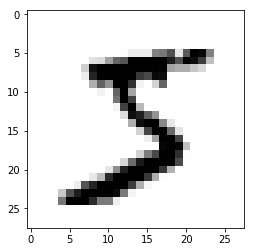

In [3]:
import matplotlib.pyplot as plt

# print(x_train[0]) # shows tensor

plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

In [4]:
# Normalizing Data so the network has an easier time learning

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

# Modeling

In [5]:
# Build the model (Feed-Forward-model)
model = tf.keras.models.Sequential()

# input layer
model.add(tf.keras.layers.Flatten()) 

# 2 hidden layers: 128 neurons, rectified linear unit
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

# output layer: 10 different digits, softmax for probability distribution
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

W0828 18:16:47.772162 12548 deprecation.py:506] From C:\Users\cholz\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [6]:
# Setting optimization method, loss function and metrics
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [7]:
# Fitting the model
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2643 - acc: 0.9224
Epoch 2/3
60000/60000 [==============================] - 5s 75us/sample - loss: 0.1066 - acc: 0.9670
Epoch 3/3
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0735 - acc: 0.9771


In [8]:
# Calculate validation loss and validation accuracy
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 42us/sample - loss: 0.1006 - acc: 0.9694
0.10063146849498153 0.9694


In [9]:
# Saving the model
model.save('basic_num_reader.model')

In [10]:
# Loading the model
new_model = tf.keras.models.load_model('basic_num_reader.model')

W0828 18:17:28.058249 12548 deprecation.py:506] From C:\Users\cholz\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0828 18:17:28.058249 12548 deprecation.py:506] From C:\Users\cholz\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0828 18:17:28.245752 12548 hdf5_format.py:263] Sequential models without an `input_shape` passed to the first layer cannot reload their optimizer state. As a result, your model isstarting with a freshly initialized optimizer.


# Making a Prediction

In [11]:
predictions = model.predict([x_test])

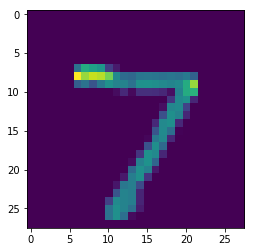

In [12]:
plt.imshow(x_test[0])
plt.show()

In [13]:
import numpy as np

print(np.argmax(predictions[0]))

7
